### Importing dataset

In [1]:

Dataset_Link:"https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset"

### Import Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#!pip install kaggle



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


### Data Image Process

### Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False  # This can be kept if needed
)


Found 9511 files belonging to 38 classes.


### Validating the process

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False  # Keep this if needed, as it's often supported
)


Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 72.5   74.25  65.  ]
   [126.   132.25 103.5 ]
   [135.5  146.75  99.5 ]
   ...
   [104.75  92.75 116.75]
   [ 84.    72.    96.  ]
   [ 98.5   86.5  110.5 ]]

  [[ 59.    59.25  57.75]
   [145.75 149.25 130.  ]
   [120.25 128.5   87.75]
   ...
   [ 90.    78.   102.  ]
   [102.5   90.5  114.5 ]
   [105.25  93.25 117.25]]

  [[ 70.25  68.    79.  ]
   [142.25 142.5  137.75]
   [125.5  131.5  101.  ]
   ...
   [110.75  98.75 122.75]
   [104.25  92.25 116.25]
   [110.    98.   122.  ]]

  ...

  [[ 80.75  75.75  86.75]
   [160.5  154.5  168.5 ]
   [163.   156.   174.  ]
   ...
   [134.75 124.75 148.75]
   [138.5  128.5  152.5 ]
   [141.   131.   155.  ]]

  [[ 87.25  81.25  93.25]
   [164.   158.   172.  ]
   [166.5  159.5  177.5 ]
   ...
   [147.25 137.25 161.25]
   [147.   137.   161.  ]
   [141.   131.   155.  ]]

  [[ 85.75  81.25  91.75]
   [166.25 160.25 174.25]
   [163.   156.   174.  ]
   ...
   [149.   139.   163.  ]
   [143.25 133.25 157.25]
   [141.75 131.75 15

### To avoid Overshooting
1.Choose small learning rate default 0.001 we are taking 0.0001
2.There may be chance of Underfitting,so increase number of neuron
3.Add more Convolution layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

### Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

### Building Convolutional Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding ='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding ='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding ='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding ='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding ='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))  # to avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

### Model Training

In [21]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
298/298 [==============================] - 1954s 7s/step - loss: 2.8487 - accuracy: 0.2100 - val_loss: 1.8666 - val_accuracy: 0.4672
Epoch 2/10
298/298 [==============================] - 1531s 5s/step - loss: 1.6218 - accuracy: 0.5169 - val_loss: 1.4301 - val_accuracy: 0.5749
Epoch 3/10
298/298 [==============================] - 1435s 5s/step - loss: 1.1345 - accuracy: 0.6556 - val_loss: 1.1556 - val_accuracy: 0.6659
Epoch 4/10
298/298 [==============================] - 1598s 5s/step - loss: 0.8734 - accuracy: 0.7244 - val_loss: 1.0328 - val_accuracy: 0.6971
Epoch 5/10
298/298 [==============================] - 1378s 5s/step - loss: 0.6870 - accuracy: 0.7840 - val_loss: 0.8774 - val_accuracy: 0.7506
Epoch 6/10
298/298 [==============================] - 1333s 4s/step - loss: 0.5527 - accuracy: 0.8237 - val_loss: 0.9733 - val_accuracy: 0.7484
Epoch 7/10
298/298 [==============================] - 1314s 4s/step - loss: 0.4609 - accuracy: 0.8535 - val_loss: 0.8548 - val_accuracy:

### Model Evaluation

In [22]:
### Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

298/298 [==============================] - 183s 613ms/step - loss: 0.0757 - accuracy: 0.9763


In [23]:
print(train_loss,train_acc)

0.07570577412843704 0.9763431549072266


In [24]:
### Model Evaluation on Valida
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 342s 621ms/step - loss: 0.7319 - accuracy: 0.8190


In [25]:
print(val_loss,val_acc)

0.7319191694259644 0.8189733624458313


### Saving model

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'loss': [2.848706007003784,
  1.6218169927597046,
  1.1344586610794067,
  0.8734124302864075,
  0.6869779229164124,
  0.5526988506317139,
  0.4608965218067169,
  0.3766665756702423,
  0.28687402606010437,
  0.236813485622406],
 'accuracy': [0.20996740460395813,
  0.5168752074241638,
  0.6555567383766174,
  0.7244243621826172,
  0.7840395569801331,
  0.8236778378486633,
  0.8535380363464355,
  0.8762485384941101,
  0.9088423848152161,
  0.9223005175590515],
 'val_loss': [1.8666388988494873,
  1.4301029443740845,
  1.1555838584899902,
  1.0327714681625366,
  0.8773990869522095,
  0.9733472466468811,
  0.854817807674408,
  0.8343936204910278,
  0.8311099410057068,
  0.731918454170227],
 'val_accuracy': [0.46722057461738586,
  0.574948787689209,
  0.6658889055252075,
  0.6970748901367188,
  0.7506259679794312,
  0.7484065294265747,
  0.7688367962837219,
  0.7810721397399902,
  0.7798770666122437,
  0.8189733624458313]}

### Recording history in json

In [28]:

import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)


### Accuracy Visualization

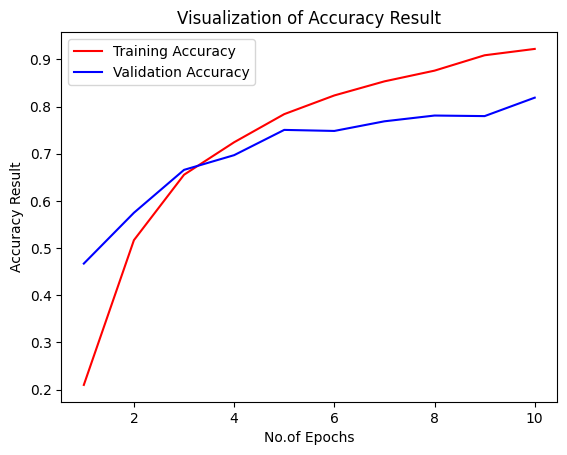

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No.of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [30]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [31]:
from tensorflow import keras

test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 384s 695ms/step


(array([[9.9996281e-01, 1.0924310e-06, 8.9039581e-11, ..., 1.5287356e-12,
         1.7861594e-11, 7.5831175e-10],
        [9.9093139e-01, 6.8638561e-05, 5.0128284e-07, ..., 3.0294196e-08,
         1.7790410e-07, 5.9701927e-07],
        [1.0000000e+00, 1.8815717e-10, 5.5502022e-12, ..., 1.5024768e-17,
         2.9975791e-15, 2.0553684e-15],
        ...,
        [1.7036283e-09, 6.1556947e-11, 5.8612631e-10, ..., 2.1892083e-10,
         1.2479016e-10, 9.9995852e-01],
        [3.2263401e-07, 1.0518281e-08, 3.8959069e-08, ..., 8.8186994e-08,
         2.0613482e-08, 9.9996996e-01],
        [3.9661204e-15, 1.7419415e-11, 4.8992640e-14, ..., 3.4339478e-16,
         6.1066196e-12, 9.9999988e-01]], dtype=float32),
 (17572, 38))

In [33]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
true_categories = tf.concat([y for x,y in validation_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [36]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([20,  1,  5, ..., 32,  0, 24], dtype=int64)>

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
class_name = ['class_1', 'class_2','class_3','class_4','class_5','class_6','class_7','class_8','class_9','class_10','class_11','class_12','class_13','class_14','class_15','class_16','class_17','class_18','class_19','class_20','class_21','class_22','class_23','class_24','class_25','class_26','class_27','class_28','class_29','class_30','class_31','class_32','class_33','class_34','class_35','class_36','class_37','class_38']  # Replace with actual class names
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

     class_1       0.03      0.02      0.03       504
     class_2       0.01      0.01      0.01       497
     class_3       0.04      0.04      0.04       440
     class_4       0.03      0.03      0.03       502
     class_5       0.02      0.02      0.02       454
     class_6       0.03      0.03      0.03       421
     class_7       0.03      0.03      0.03       456
     class_8       0.02      0.03      0.03       410
     class_9       0.02      0.02      0.02       477
    class_10       0.03      0.03      0.03       477
    class_11       0.03      0.03      0.03       465
    class_12       0.02      0.02      0.02       472
    class_13       0.02      0.03      0.02       480
    class_14       0.02      0.02      0.02       430
    class_15       0.02      0.03      0.02       423
    class_16       0.03      0.03      0.03       503
    class_17       0.03      0.03      0.03       459
    class_18       0.04    

In [39]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

### Confusion Matrix Visualization

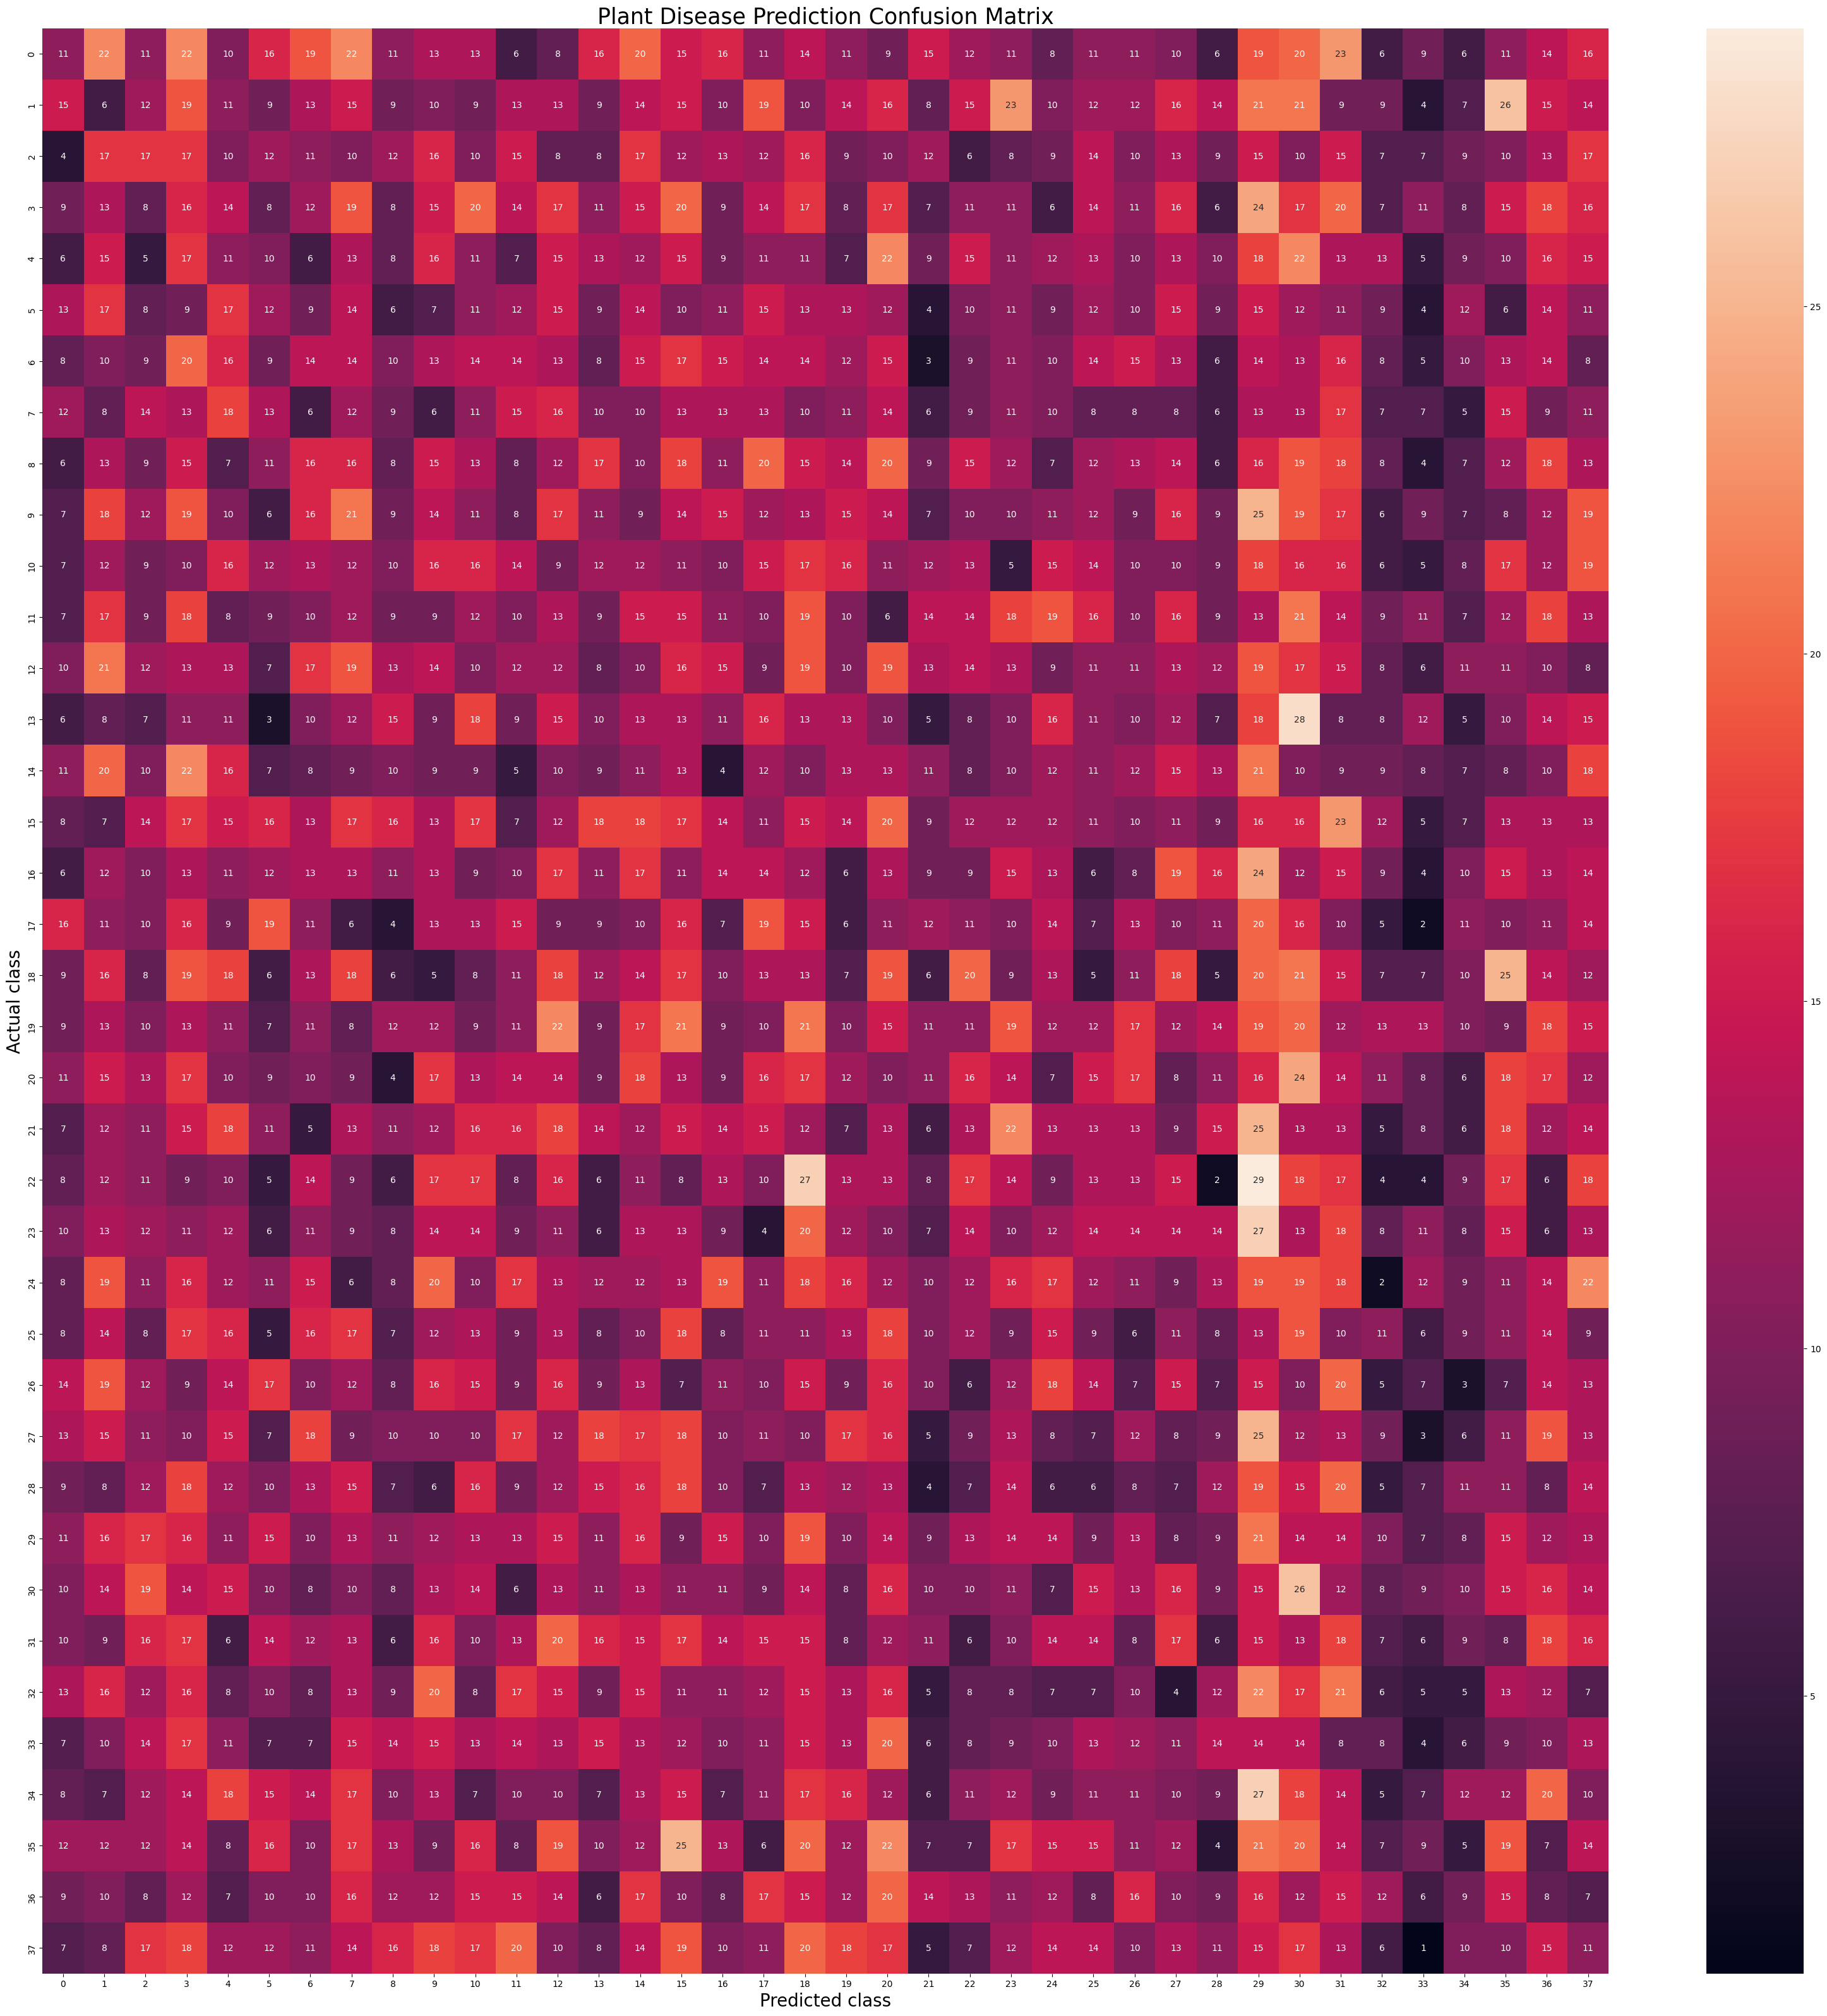

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cm' is your confusion matrix
plt.figure(figsize=(40, 40))  # Corrected from figsize(40,40) to figsize=(40, 40)
sns.heatmap(cm, annot=True, annot_kws={'size': 10})  # Corrected syntax for annot_kws
plt.xlabel("Predicted class", fontsize=20)
plt.ylabel("Actual class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()
